# Task 1

In [41]:
from utils import *
from MySolution import MyClassifier, MyClustering
from sklearn.decomposition import PCA

## Synthetic Data

In [42]:
syn_data = prepare_synthetic_data()
X_train, y_train = syn_data['trainX'], syn_data['trainY']
X_test, y_test = syn_data['testX'], syn_data['testY']

In [3]:
clf_syn = MyClassifier()
clf_syn.train(X_train, y_train)
y_pred = clf_syn.predict(X_test)

In [4]:
acc_syn = clf_syn.evaluate(X_test, y_test)
print(f"Accuracy: {acc_syn*100:.2f}%")

Accuracy: 97.20%


### Confusion Matrix

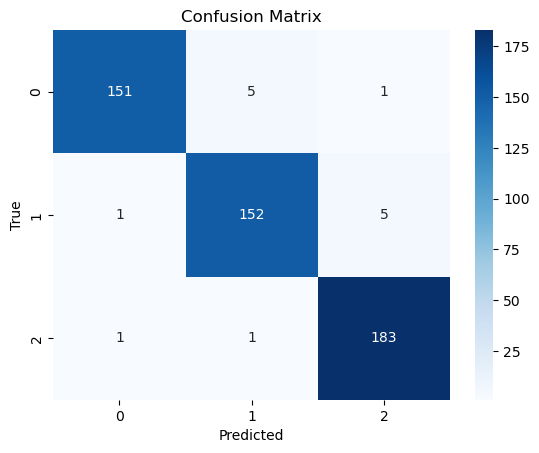

In [5]:
clf_syn.plot_confusion_matrix(y_pred, y_test)

### Decision Boundary

#### Training Split

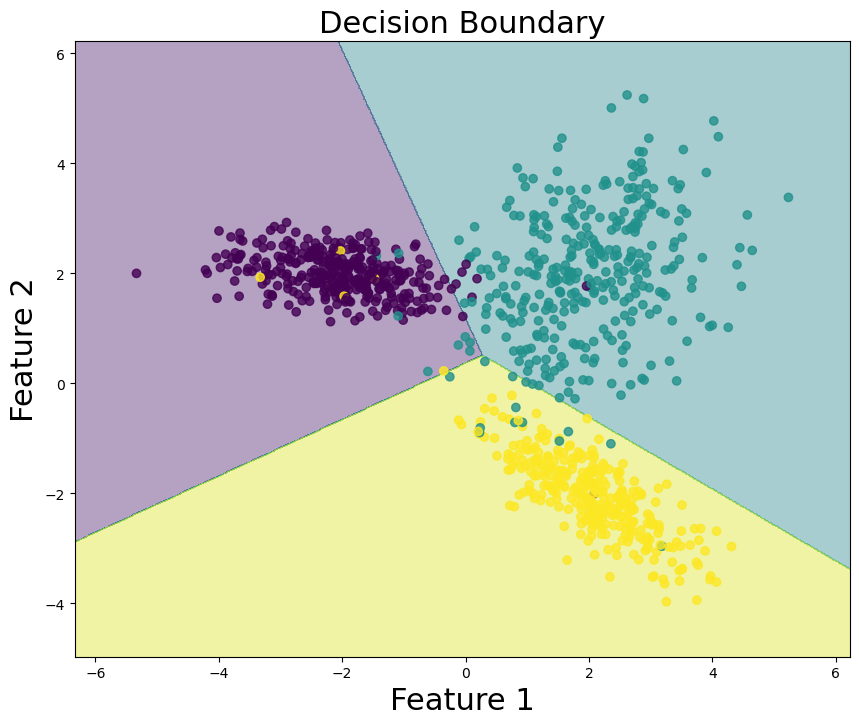

In [6]:
clf_syn.plot_decision_boundary(X_train, y_train, title="Decision Boundary", size=22)

#### Test Split

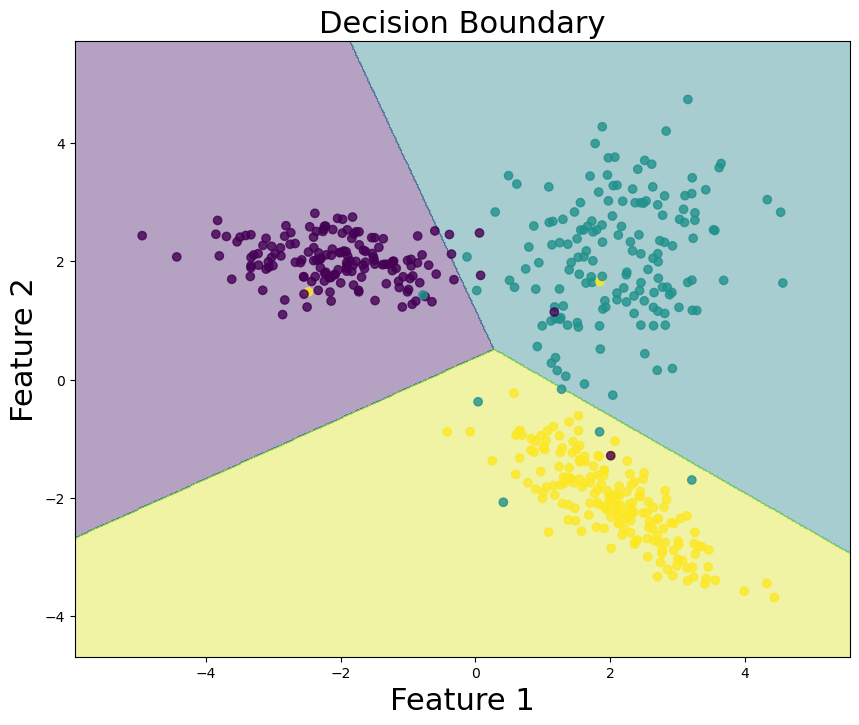

In [7]:
clf_syn.plot_decision_boundary(X_test, y_test, title="Decision Boundary")

### Different regularization parameters

In [43]:
lambdas = [0.1, 0.5, 1, 5, 10, 50, 100]
accuracies = []
for l in lambdas:
    clf_syn = MyClassifier(lambda_reg=l)
    clf_syn.train(X_train, y_train)
    y_pred = clf_syn.predict(X_test)
    accuracy = clf_syn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

In [44]:
print('The best lambda and its accuracy:', lambdas[np.argmax(accuracies)], np.max(accuracies))

The best lambda and its accuracy: 5 0.974


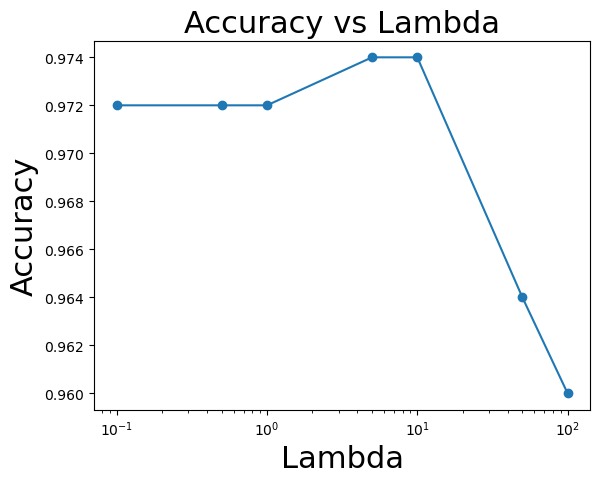

In [46]:
plt.scatter(lambdas, accuracies)
plt.plot(lambdas, accuracies)
plt.xlabel("Lambda", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Accuracy vs Lambda", fontsize=22)
plt.xscale('log')
plt.show()

## Fashion MNIST

PCA has been used here to reduce the dimensionality of the data. The data has been reduced to different dimensions and the accuracy of the model has been calculated for each dimension. The accuracy has been plotted against the number of dimensions.

When the data is reduced to 2 dimensions, the decision boundary is plotted.

In [33]:
# load mnist data
mnist_data = prepare_mnist_data()

n_dim = [784, 500, 300, 100, 10, 5, 2]

### Full dimensionality

In [13]:
pca = PCA(n_components=n_dim[0]) 
X_train_reduced = pca.fit_transform(mnist_data['trainX'])
X_test_reduced = pca.transform(mnist_data['testX'])

trainX_reduced = X_train_reduced/255
testX_reduced = X_test_reduced/255
trainY = mnist_data['trainY']
testY = mnist_data['testY']

In [14]:
clf_mnist = MyClassifier()
clf_mnist.train(trainX_reduced, trainY)
y_pred = clf_mnist.predict(testX_reduced)

In [15]:
accs = clf_mnist.evaluate(testX_reduced, testY)
print(f"Accuracy: {accs*100:.2f}%")

Accuracy: 76.40%


#### Confusion Matrix

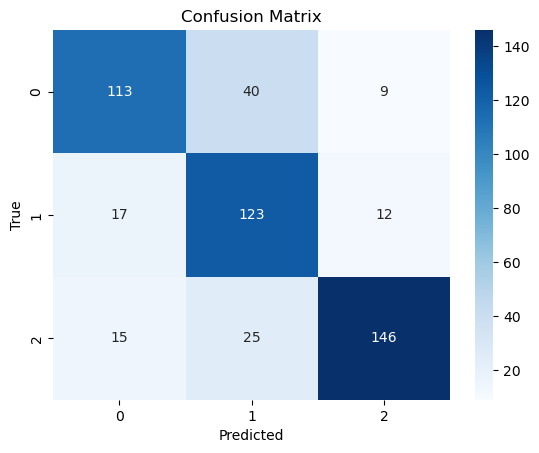

In [14]:
clf_mnist.plot_confusion_matrix(y_pred, testY)

### Different Dimensionality

In [34]:
# plot the accuracy vs number of dimensions
accs = []
for n in n_dim:
    pca = PCA(n_components=n)
    X_train_reduced = pca.fit_transform(mnist_data['trainX'])
    X_test_reduced = pca.transform(mnist_data['testX'])

    trainX_reduced = X_train_reduced/255
    testX_reduced = X_test_reduced/255
    trainY = mnist_data['trainY']
    testY = mnist_data['testY']

    clf_mnist = MyClassifier()
    clf_mnist.train(trainX_reduced, trainY)
    y_pred = clf_mnist.predict(testX_reduced)

    accs.append(clf_mnist.evaluate(testX_reduced, testY))

In [35]:
print(accs)
print('Max accuracy and occuring at n_dim:', max(accs), n_dim[accs.index(max(accs))])

[0.764, 0.86, 0.86, 0.9, 0.9, 0.874, 0.676]
Max accuracy and occuring at n_dim: 0.9 100


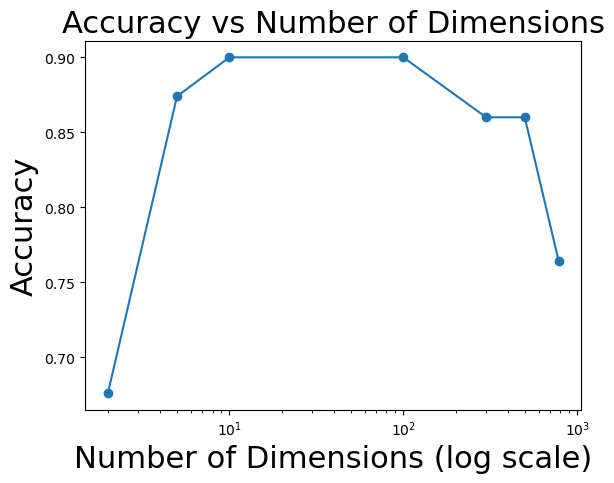

In [36]:
#scatter with line plot and dim on log scale
plt.scatter(n_dim, accs)
plt.plot(n_dim, accs)
plt.xlabel("Number of Dimensions (log scale)", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Accuracy vs Number of Dimensions", fontsize=22)
plt.xscale('log')
plt.show()

### Decision Boundary (only 2 features using PCA)

In [19]:
pca = PCA(n_components=n_dim[-1])  # Reduce to 50 dimensions
X_train_reduced = pca.fit_transform(mnist_data['trainX'])
X_test_reduced = pca.transform(mnist_data['testX'])

trainX_reduced = X_train_reduced/255
testX_reduced = X_test_reduced/255
trainY = mnist_data['trainY']
testY = mnist_data['testY']

In [20]:
clf_mnist = MyClassifier()
clf_mnist.train(trainX_reduced, trainY)
y_pred = clf_mnist.predict(testX_reduced)

In [21]:
acc_mnist_2 = clf_mnist.evaluate(testX_reduced, testY)
print(f"Accuracy: {acc_mnist_2*100:.2f}%")

Accuracy: 67.60%


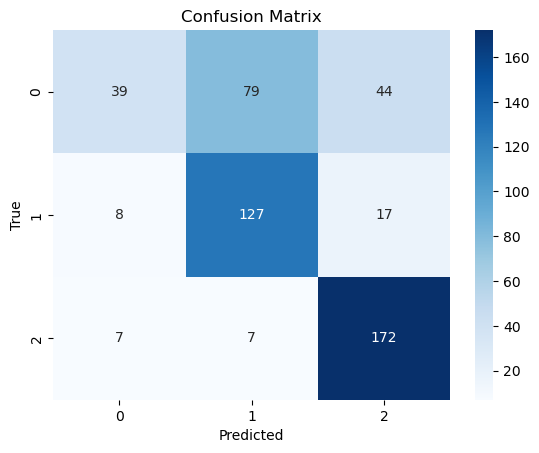

In [22]:
clf_mnist.plot_confusion_matrix(y_pred, testY)

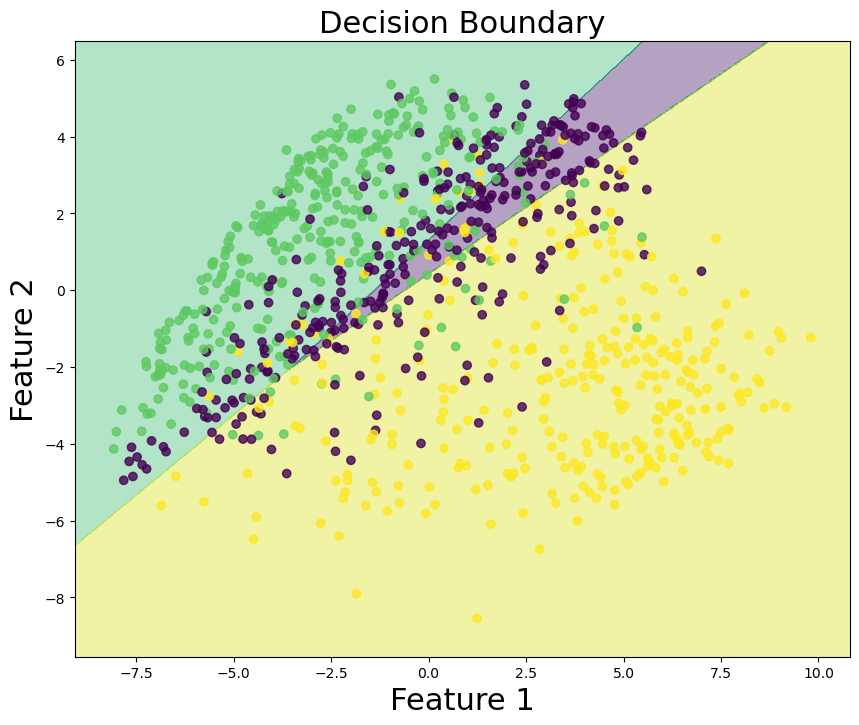

In [23]:
clf_mnist.plot_decision_boundary(trainX_reduced, trainY, title="Decision Boundary")

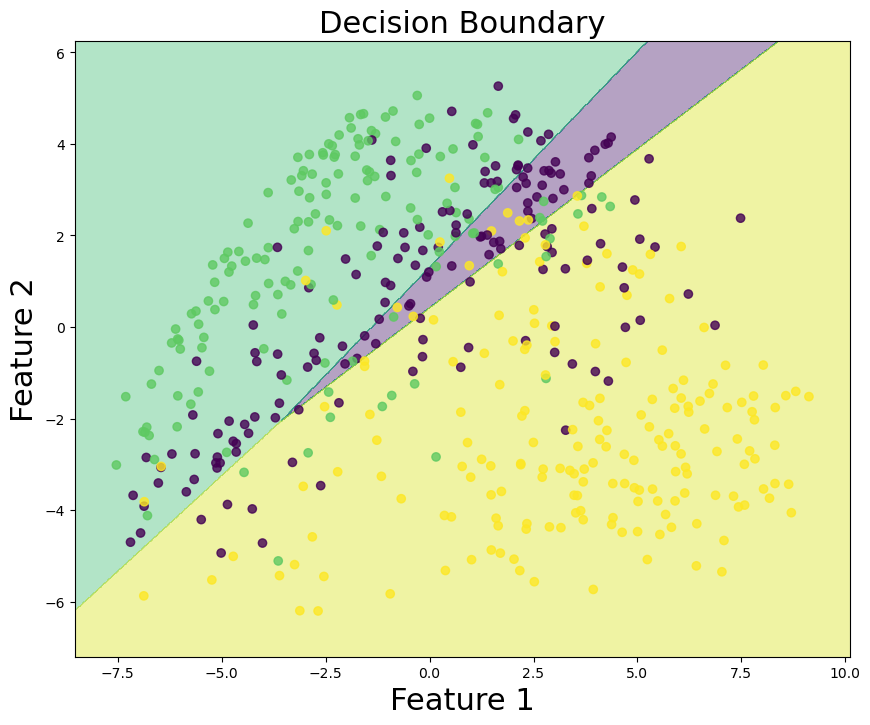

In [24]:
clf_mnist.plot_decision_boundary(testX_reduced, testY, title="Decision Boundary")

### Different Regularization Parameters

In [25]:
lambdas = [1e-4, 1e-2, 0.1, 1, 5, 10]
n_dim = 10 # max of accuracy vs number of dimensions
accuracies = []
for l in lambdas:
    pca = PCA(n_components=n_dim)  # Reduce to 10 dimensions as max accuracy occurs at 10
    X_train_reduced = pca.fit_transform(mnist_data['trainX'])
    X_test_reduced = pca.transform(mnist_data['testX'])

    trainX_reduced = X_train_reduced/255
    testX_reduced = X_test_reduced/255
    trainY = mnist_data['trainY']
    testY = mnist_data['testY']

    clf_mnist = MyClassifier(lambda_reg=l)
    clf_mnist.train(trainX_reduced, trainY)
    y_pred = clf_mnist.predict(testX_reduced)
    accuracy = clf_mnist.evaluate(testX_reduced, testY)
    accuracies.append(accuracy)

In [26]:
print('The maximum accuracy and the lambda value:', max(accuracies), lambdas[accuracies.index(max(accuracies))])
acc_mnist = max(accuracies)

The maximum accuracy and the lambda value: 0.9 0.1


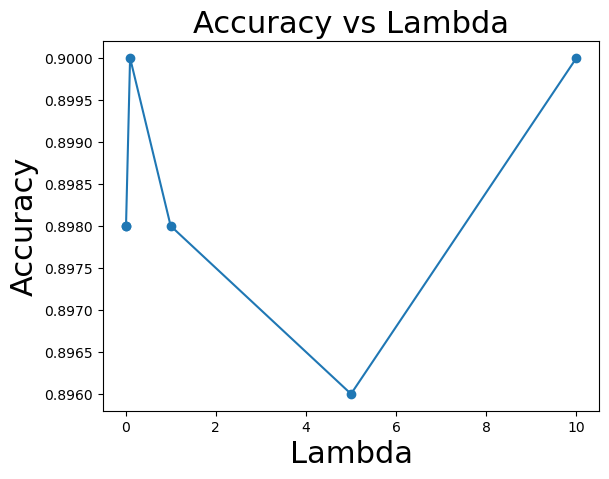

In [27]:
plt.scatter(lambdas, accuracies)
plt.plot(lambdas, accuracies)
plt.xlabel("Lambda", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Accuracy vs Lambda", fontsize=22)
plt.show()

# Task 2

In [27]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)

K_synthetic = [3, 5, 10]
K_mnist = [3, 10, 32]

result2 = {}
nmi_list = []
accuracy_list = []
# Synthetic data experiments
for K in K_synthetic:
    data = prepare_synthetic_data()
    clustering_class = MyClustering(K)
    clustering_class.train(data['trainX'])
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    nmi = clustering_class.evaluate_clustering(data['trainY'])
    nmi_list.append(nmi)
    print(f"Clustering NMI for K={K}: {nmi}")
    accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    result2['synthetic'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}
    # print(result2)

nmi_list = []
accuracy_list = []
# MNIST data experiments
for K in K_mnist:
    data = prepare_mnist_data()
    clustering_class = MyClustering(K)
    clustering_class.train(data['trainX'])
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    nmi = clustering_class.evaluate_clustering(data['trainY'])
    nmi_list.append(nmi)
    print(f"Clustering NMI for K={K}: {nmi}")
    accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    result2['mnist'] = {'K': K_mnist, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

print(result2)


# Task 1
result1 = {'synthetic_test_accuracy':0.9, 'mnist_test_accuracy':0.85}


# Task 2
# result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.6,0.6,0.6], 'classification_accuracy':[0.8,0.8,0.8]},
#             'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.5,0.5,0.5], 'classification_accuracy':[0.7,0.7,0.7]}}

# Task 3
# only include the plots for the option of task 3 you chosen in the report                    
# result3_1 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
#             'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}

result3_2 = {'feature_number':[5, 20, 80, 320, 784], 'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'classifier_accuracy(random)':[0.4,0.4,0.6,0.6,0.6], 
                                                'clustering_accuracy(our algo)':[0.35,0.35,0.45,0.55,0.6], 'clustering_accuracy(random)':[0.3,0.3,0.4,0.5,0.6], 
                                                'nmi(our algo)':[0.35,0.4,0.45,0.5,0.5], 'nmi(random)':[0.3,0.35,0.4,0.5,0.5]}


# plot_result(result2=result2)

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)

Number of components selected: 2
Explained variance covered: 1.00
Converged after 5 iterations.
Clustering NMI for K=3: 0.8278254854605318
Classification accuracy for K=3: 0.968
Number of components selected: 2
Explained variance covered: 1.00
Converged after 7 iterations.
Clustering NMI for K=5: 0.6932654011613067
Classification accuracy for K=5: 0.926
Number of components selected: 2
Explained variance covered: 1.00
Clustering NMI for K=10: 0.8698036614470138
Classification accuracy for K=10: 0.976
Number of components selected: 123
Explained variance covered: 0.95
Clustering NMI for K=3: 0.28164989346192487
Classification accuracy for K=3: 0.612
Number of components selected: 123
Explained variance covered: 0.95
Converged after 15 iterations.
Clustering NMI for K=10: 0.49775094067091064
Classification accuracy for K=10: 0.8
Number of components selected: 123
Explained variance covered: 0.95
Clustering NMI for K=32: 0.6043128706289214
Classification accuracy for K=32: 0.864
{'synthet

# Final Combine

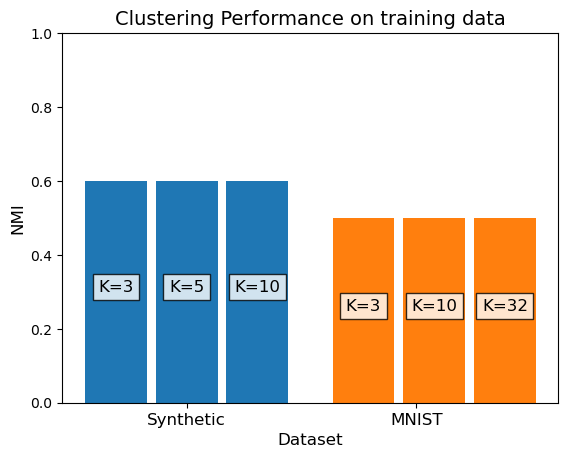

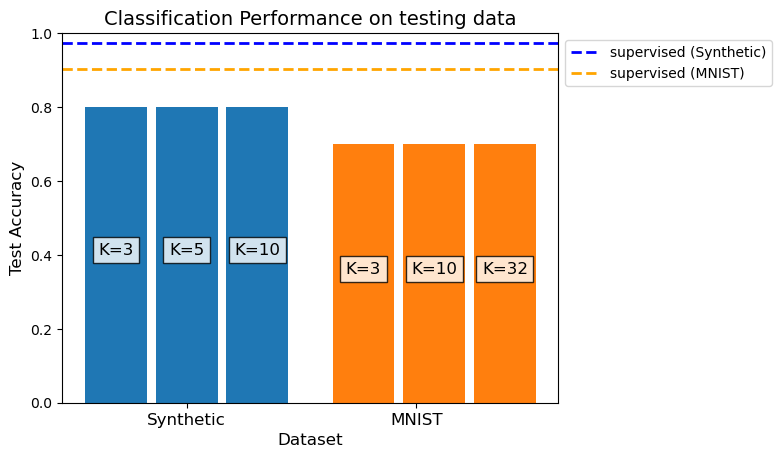

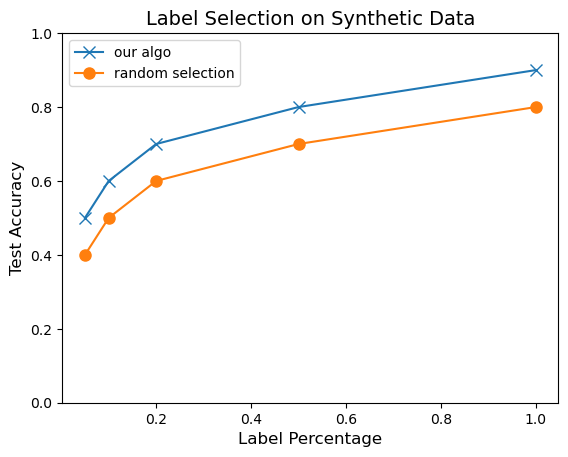

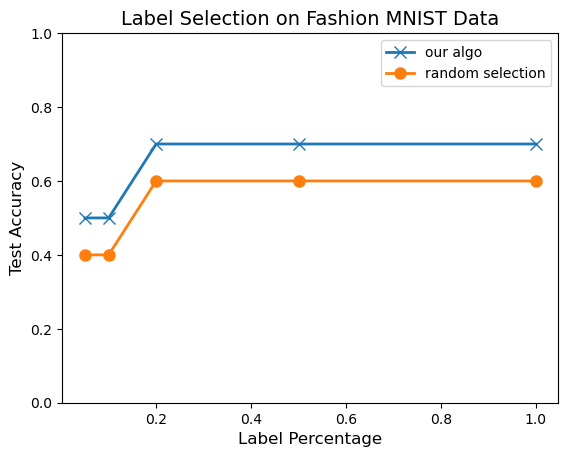

In [30]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)


# Task 1
result1 = {'synthetic_test_accuracy':acc_syn, 'mnist_test_accuracy':acc_mnist}

# Task 2
result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.6,0.6,0.6], 'classification_accuracy':[0.8,0.8,0.8]},
            'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.5,0.5,0.5], 'classification_accuracy':[0.7,0.7,0.7]}}

# Task 3
# only include the plots for the option of task 3 you chosen in the report                    
result3_1 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
            'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}

result3_2 = {'feature_number':[5, 20, 80, 320, 784], 'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'classifier_accuracy(random)':[0.4,0.4,0.6,0.6,0.6], 
                                                'clustering_accuracy(our algo)':[0.35,0.35,0.45,0.55,0.6], 'clustering_accuracy(random)':[0.3,0.3,0.4,0.5,0.6], 
                                                'nmi(our algo)':[0.35,0.4,0.45,0.5,0.5], 'nmi(random)':[0.3,0.35,0.4,0.5,0.5]}


plot_result(result1 = result1, result2 = result2, result3_1 = result3_1)

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)